In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwordsm,
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
df = pd.read_csv("2021_수능.csv")

In [ ]:
for i in range(len(df)):
    df["contents"][i]=re.sub("[①-⑤]\s","",df["contents"][i])

<ipython-input-160-958e05751f0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["contents"][i]=re.sub("[①-⑤]\s","",df["contents"][i])


In [ ]:
num_len=0
sent_num=0
max_sent=0
min_sent=0
nostop_token=0
stop_token=0
stop_words = set(stopwords.words('english')) 
da=np.array([])
for i in range(len(df)):
    num_len=(len(df["contents"][i]))
    sent_tokens = sent_tokenize(df["contents"][i])
    sent_num=(len(sent_tokens))
    max_sent=(len(max(sent_tokens, key=len)))
    min_sent=(len(min(sent_tokens, key=len)))
    mean_sent=0
    for k in (sent_tokens):
        mean_sent+=len(k)  
    mean_sent=mean_sent/len(sent_tokens)
    
    df["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df["contents"][i])
    
    nostop_token=(len(word_tokenize(df["contents"][i])))
    
    result = []
    for w in word_tokenize(df["contents"][i]): 
        if w not in stop_words: 
            result.append(w)       
    stop_token=(len(result))
    da=np.append(da,np.array([[df["number"].values[i],num_len,sent_num,max_sent,min_sent,mean_sent,nostop_token,stop_token]]))

<ipython-input-161-fb9abc6bd1b0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["contents"][i]=re.sub("[^a-zA-Z0-9]"," ",df["contents"][i])


In [ ]:
da=da.reshape(-1,8)

In [ ]:
out_data = pd.DataFrame(data=da,columns=["문항번호","지문길이(len)", "문장수","Max문장길이(len)","Min문장길이(len)","Mean문장길이(len)","토큰수(불용어포함)","토큰수(불용어제외)"])

In [ ]:
out_data=out_data.astype({"문항번호":"int","지문길이(len)":"int", "문장수":"int","Max문장길이(len)":"int","Min문장길이(len)":"int","토큰수(불용어포함)":"int","토큰수(불용어제외)":"int"})

In [ ]:
out_data.to_csv("out_data.csv",index=False, encoding="cp949")

In [ ]:
df = pd.read_csv("2021_수능.csv")
for i in range(len(df)):
    df["contents"][i]=re.sub("[①-⑤]\s","",df["contents"][i])

<ipython-input-172-307f8f640c95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["contents"][i]=re.sub("[①-⑤]\s","",df["contents"][i])


In [ ]:
sent_corpus = [sent_tokenize(s) for s in df["contents"]]

In [ ]:
out_data

,문항번호,지문길이(len),문장수,Max문장길이(len),Min문장길이(len),Mean문장길이(len),토큰수(불용어포함),토큰수(불용어제외)
0,18,637,8,139,25,78.750000,110,69
1,19,697,9,123,22,76.555556,122,73
2,20,968,6,249,38,160.500000,165,90
3,21,1021,8,269,31,126.750000,171,99
4,22,1002,6,239,83,166.166667,149,93
5,23,1005,7,224,52,142.714286,157,85
6,24,994,8,178,40,123.375000,161,95
7,25,823,6,196,110,136.333333,158,87
8,28,753,10,123,44,74.400000,131,80
9,29,1028,9,153,47,113.333333,170,105


In [ ]:
all_corpus=[]
for i in sent_corpus:
    all_corpus=all_corpus+i

all_text_len=0
all_sent_len=len(all_corpus)

for i in all_corpus:
    all_text_len+=len(i)
    
all_max_len = len(max(all_corpus, key=len))
all_min_len = len(min(all_corpus, key=len))  
all_mean_len = all_text_len/len(all_corpus)

all_nostop_token = out_data["토큰수(불용어포함)"].sum()
all_stop_token = out_data["토큰수(불용어제외)"].sum()

In [ ]:
da=np.array([])
da=np.append(da,np.array([all_text_len,all_sent_len,all_max_len,all_min_len,all_mean_len,all_nostop_token,all_stop_token]))

In [ ]:
da=da.reshape(-1,7)

In [ ]:
all_data = pd.DataFrame(data=da,columns=["지문길이(len)", "문장수","Max문장길이(len)","Min문장길이(len)","Mean문장길이(len)","토큰수(불용어포함)","토큰수(불용어제외)"])

In [ ]:
all_data=all_data.astype({"지문길이(len)":"int", "문장수":"int","Max문장길이(len)":"int","Min문장길이(len)":"int","토큰수(불용어포함)":"int","토큰수(불용어제외)":"int"})

In [ ]:
all_data

,지문길이(len),문장수,Max문장길이(len),Min문장길이(len),Mean문장길이(len),토큰수(불용어포함),토큰수(불용어제외)
0,23519,183,321,14,128.519126,3901,2236


In [ ]:
all_data.to_csv("all_data.csv",index=False, encoding="cp949")

In [ ]:
for i in range(len(all_corpus)):
    all_corpus[i]=re.sub("[^a-zA-Z0-9]"," ",all_corpus[i])
    all_corpus[i]=all_corpus[i].lower()

In [ ]:
all_token =  [word_tokenize(s) for s in all_corpus]

In [ ]:
all_token

[['dear',
  'ms',
  'green',
  'my',
  'name',
  'is',
  'donna',
  'williams',
  'a',
  'science',
  'teacher',
  'at',
  'rogan',
  'high',
  'school'],
 ['i',
  'am',
  'planning',
  'a',
  'special',
  'workshop',
  'for',
  'our',
  'science',
  'teachers'],
 ['we',
  'are',
  'interested',
  'in',
  'learning',
  'how',
  'to',
  'teach',
  'online',
  'science',
  'classes'],
 ['i',
  'have',
  'been',
  'impressed',
  'with',
  'your',
  'ideas',
  'about',
  'using',
  'internet',
  'platforms',
  'for',
  'science',
  'classes'],
 ['since',
  'you',
  'are',
  'an',
  'expert',
  'in',
  'online',
  'education',
  'i',
  'would',
  'like',
  'to',
  'ask',
  'you',
  'to',
  'deliver',
  'a',
  'special',
  'lecture',
  'at',
  'the',
  'workshop',
  'scheduled',
  'for',
  'next',
  'month'],
 ['i',
  'am',
  'sure',
  'the',
  'lecture',
  'will',
  'help',
  'our',
  'teachers',
  'manage',
  'successful',
  'online',
  'science',
  'classes',
  'and',
  'i',
  'hope',
  '

In [ ]:
result = []
for i in range(len(all_token)):
    for w in all_token[i]: 
        if w not in stop_words: 
            result.append(w)
all_stop_token=result

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
all_stop_token=[lemmatizer.lemmatize(w) for w in all_stop_token]

In [ ]:
a_s_t_name = pd.Series(all_stop_token,range(len(all_stop_token)))

In [ ]:
a_s_t_name.value_counts().to_csv("ast_name.csv", encoding="cp949")

In [ ]:
a_s_t = pd.Series(nltk.pos_tag(all_stop_token),range(len(all_stop_token)))

In [ ]:
a_s_t.value_counts().to_csv("ast.csv", encoding="cp949")

In [ ]:
word_cloud=""
for i in all_corpus:
    word_cloud= word_cloud + i

In [ ]:
word_cloud

'dear ms  green  my name is donna williams  a science teacher at rogan high school i am planning a special workshop for our science teachers we are interested in learning how to teach online science classes i have been impressed with your ideas about using internet platforms for science classes since you are an expert in online education  i would like to ask you to deliver a special lecture at the workshop scheduled for next month i am sure the lecture will help our teachers manage successful online science classes  and i hope we can learn from your insights i am looking forward to hearing from you sincerely  donna williamsit was evelyn s first time to explore the badlands of alberta  famous across canada for its numerous dinosaur fossils as a young amateur bone hunter  she was overflowing with anticipation she had not travelled this far for the bones of common dinosaur species her life long dream to find rare fossils of dinosaurs was about to come true she began eagerly searching for 

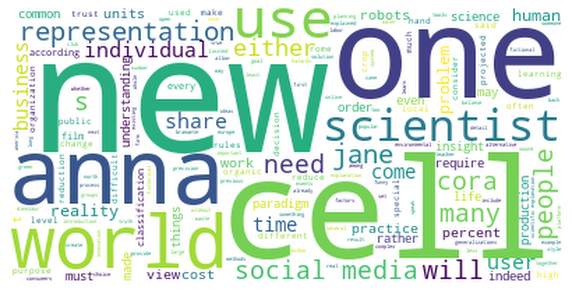

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white').generate(word_cloud)

plt.figure(figsize=(10,8)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.savefig("wordcloud.png")


In [ ]:
a_s_t.value_counts()[:80]

cell            16
one             14
anna            13
new             12
world           11
                ..
special          4
reduction        4
difficult        4
organization     4
system           4
Length: 80, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


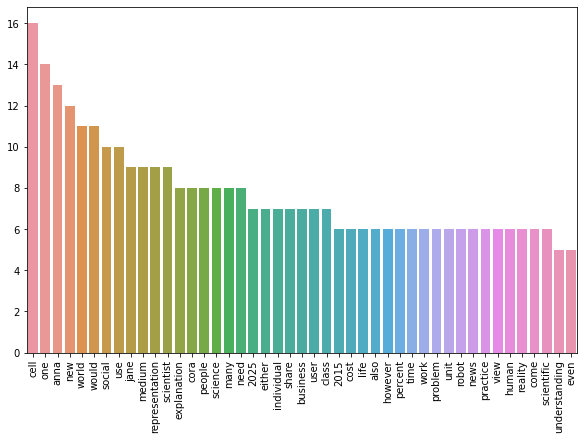

In [ ]:
plt.figure(figsize=(8,6),constrained_layout=True)
sns.barplot(a_s_t.value_counts()[:45].index,a_s_t.value_counts()[:45].values)
plt.xticks(rotation=90)
plt.savefig("count_plot.png")
